In [1279]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas

In [1280]:
k_number_sum = 2 + 1 + 2 + 0 + 4 + 1 + 3 + 4
k_number_sum

17

In [1281]:
k_reminder = k_number_sum % 4
k_reminder

1

In [1282]:
CLASS_1 = [[5, 1], [2, 5], [4, 4], [2, 3], [3, 1], [4, 2], [3, 3], [2, 2], [3, 4], [4, 3]]
CLASS_2 = [[9, 9], [7, 8], [5, 9], [9, 15], [7, 11], [8, 15], [7, 13], [8, 14], [6, 14], [10, 14]]
CLASS_3 = [[11, 5], [10, 2], [11, 3], [12, 5], [18, 1], [16, 4], [14, 4], [12, 4], [17, 5], [13, 5]]

COMBINED_CLASS_X = np.array(CLASS_1 + CLASS_2 + CLASS_3)

Original_DF = pandas.DataFrame({ "CLASS_1": CLASS_1, "CLASS_2": CLASS_2, "CLASS_3": CLASS_3 })
print(Original_DF)


  CLASS_1   CLASS_2  CLASS_3
0  [5, 1]    [9, 9]  [11, 5]
1  [2, 5]    [7, 8]  [10, 2]
2  [4, 4]    [5, 9]  [11, 3]
3  [2, 3]   [9, 15]  [12, 5]
4  [3, 1]   [7, 11]  [18, 1]
5  [4, 2]   [8, 15]  [16, 4]
6  [3, 3]   [7, 13]  [14, 4]
7  [2, 2]   [8, 14]  [12, 4]
8  [3, 4]   [6, 14]  [17, 5]
9  [4, 3]  [10, 14]  [13, 5]


In [1283]:
COMBINED_CLASS_Y = np.array([1] * len(CLASS_1) + [2] * len(CLASS_2) + [3] * len(CLASS_3))
COMBINED_CLASS_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [1284]:
CLASS_1_X = [x[0] for x in CLASS_1]
CLASS_1_Y = [x[1] for x in CLASS_1]

CLASS_2_X = [x[0] for x in CLASS_2]
CLASS_2_Y = [x[1] for x in CLASS_2]

CLASS_3_X = [x[0] for x in CLASS_3]
CLASS_3_Y = [x[1] for x in CLASS_3]

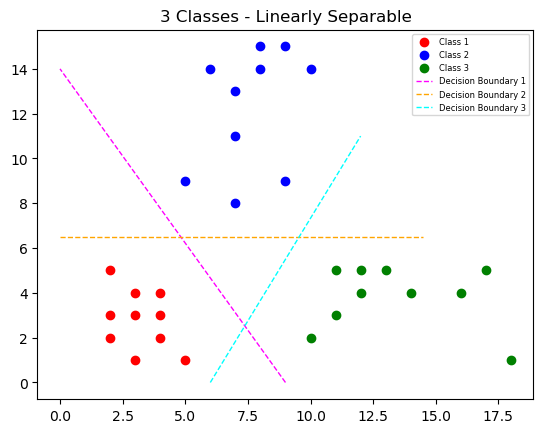

In [1285]:
plt.scatter(CLASS_1_X, CLASS_1_Y, color='red')
plt.scatter(CLASS_2_X, CLASS_2_Y, color='blue')
plt.scatter(CLASS_3_X, CLASS_3_Y, color='green')


plt.plot([9, 0], [0, 14], color='magenta', linestyle='dashed', linewidth=1)
plt.plot([0, 14.5], [6.5, 6.5], color='orange', linestyle='dashed', linewidth=1)
plt.plot([6, 12], [0, 11], color='cyan', linestyle='dashed', linewidth=1)

plt.title('3 Classes - Linearly Separable')

plt.legend(['Class 1', 'Class 2', 'Class 3', 'Decision Boundary 1', 'Decision Boundary 2', 'Decision Boundary 3'],prop={'size': 6})

plt.show()

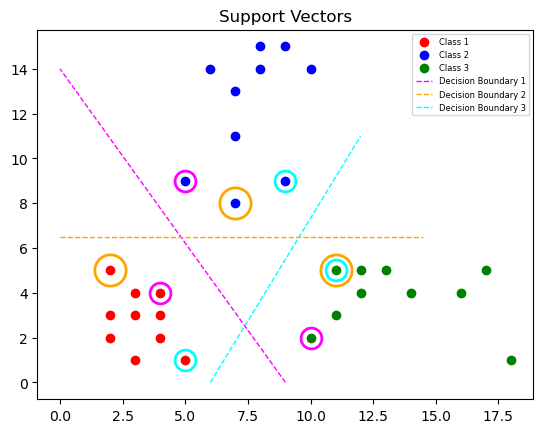

In [1286]:
plt.scatter(CLASS_1_X, CLASS_1_Y, color='red')
plt.scatter(CLASS_2_X, CLASS_2_Y, color='blue')
plt.scatter(CLASS_3_X, CLASS_3_Y, color='green')

plt.plot([9, 0], [0, 14], color='magenta', linestyle='dashed', linewidth=1)
plt.plot([0, 14.5], [6.5, 6.5], color='orange', linestyle='dashed', linewidth=1)
plt.plot([6, 12], [0, 11], color='cyan', linestyle='dashed', linewidth=1)

radius = 7.5

# Class 1 Support Vectors
plt.plot(5, 1, 'o',
   ms=radius * 2, mec='cyan', mfc='none', mew=2)
plt.plot(11, 5, 'o',
   ms=radius * 2, mec='cyan', mfc='none', mew=2)
plt.plot(9, 9, 'o',
   ms=radius * 2, mec='cyan', mfc='none', mew=2)


# Class 2 Support Vectors
plt.plot(4, 4, 'o',
   ms=radius * 2, mec='magenta', mfc='none', mew=2)
plt.plot(10, 2, 'o',
   ms=radius * 2, mec='magenta', mfc='none', mew=2)
plt.plot(5, 9, 'o',
   ms=radius * 2, mec='magenta', mfc='none', mew=2)

# Class 3 Support Vectors
plt.plot(7, 8, 'o',
   ms=radius * 3, mec='orange', mfc='none', mew=2)
plt.plot(2, 5, 'o',
   ms=radius * 3, mec='orange', mfc='none', mew=2)
plt.plot(11, 5, 'o',
   ms=radius * 3, mec='orange', mfc='none', mew=2)

plt.title('Support Vectors')

plt.legend(['Class 1', 'Class 2', 'Class 3', 'Decision Boundary 1', 'Decision Boundary 2', 'Decision Boundary 3'],prop={'size': 6})

plt.show()

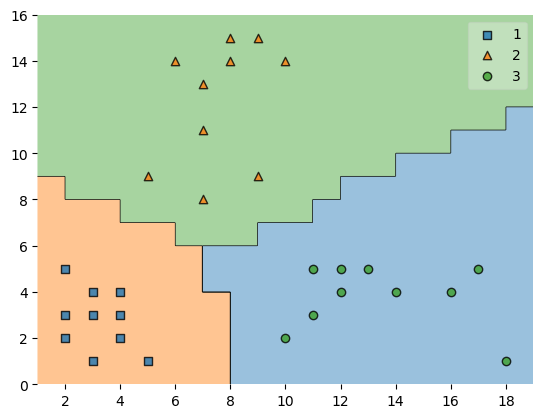

In [1287]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(C=0.5, kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(COMBINED_CLASS_X, COMBINED_CLASS_Y)

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(COMBINED_CLASS_X, COMBINED_CLASS_Y, clf=clf, legend=1)
plt.show()

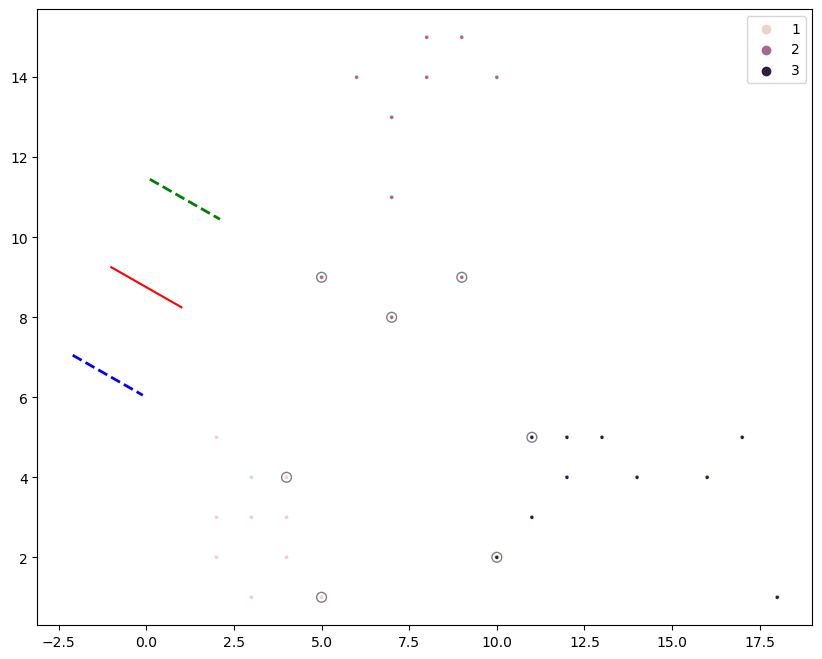

In [1288]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=COMBINED_CLASS_X[:, 0], 
                y=COMBINED_CLASS_X[:, 1], 
                hue=COMBINED_CLASS_Y, 
                s=8);
# Constructing a hyperplane using a formula.
w = clf.coef_[0]           # w consists of 2 elements
b = clf.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);
# Step 2 (unit-vector):
w_hat = clf.coef_[0] / (np.sqrt(np.sum(clf.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(clf.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

In [1289]:
# CLASS_T = [[1.5, 2], [4, 1], [4, 5], [2, 5], [12, 3], [7, 10], [8, 12], [10.5, 4], [8, 7], [11, 2]]
CLASS_T = []
for i in range(0, len(CLASS_1)):
    x_value = round((CLASS_1_X[i] + CLASS_2_X[i] + CLASS_3_X[i]) / 3)
    y_value = round((CLASS_1_Y[i] + CLASS_2_Y[i] + CLASS_3_Y[i]) / 3)
    CLASS_T.append([x_value, y_value])

TEST_DF = pandas.DataFrame({ "CLASS_1": CLASS_1, "CLASS_2": CLASS_2, "CLASS_3": CLASS_3, "CLASS_T": CLASS_T })
print(TEST_DF)

  CLASS_1   CLASS_2  CLASS_3 CLASS_T
0  [5, 1]    [9, 9]  [11, 5]  [8, 5]
1  [2, 5]    [7, 8]  [10, 2]  [6, 5]
2  [4, 4]    [5, 9]  [11, 3]  [7, 5]
3  [2, 3]   [9, 15]  [12, 5]  [8, 8]
4  [3, 1]   [7, 11]  [18, 1]  [9, 4]
5  [4, 2]   [8, 15]  [16, 4]  [9, 7]
6  [3, 3]   [7, 13]  [14, 4]  [8, 7]
7  [2, 2]   [8, 14]  [12, 4]  [7, 7]
8  [3, 4]   [6, 14]  [17, 5]  [9, 8]
9  [4, 3]  [10, 14]  [13, 5]  [9, 7]


In [1290]:
CLASS_T_X = [x[0] for x in CLASS_T]
CLASS_T_Y = [x[1] for x in CLASS_T]

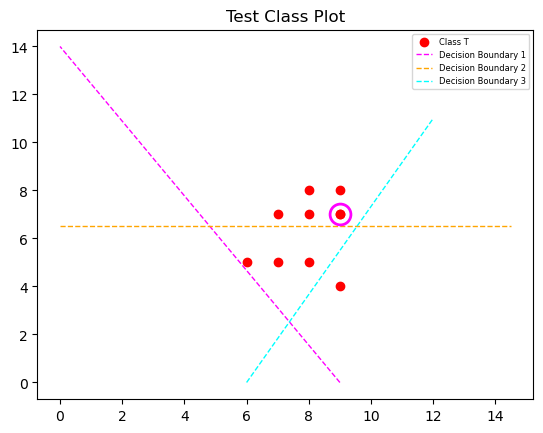

In [1291]:
plt.scatter(CLASS_T_X, CLASS_T_Y, color='red')

plt.plot([9, 0], [0, 14], color='magenta', linestyle='dashed', linewidth=1)
plt.plot([0, 14.5], [6.5, 6.5], color='orange', linestyle='dashed', linewidth=1)
plt.plot([6, 12], [0, 11], color='cyan', linestyle='dashed', linewidth=1)

plt.plot(CLASS_T_X[9], CLASS_T_Y[9], 'o',
   ms=radius * 2, mec='magenta', mfc='none', mew=2)

plt.title('Test Class Plot')

plt.legend(['Class T', 'Decision Boundary 1', 'Decision Boundary 2', 'Decision Boundary 3'],prop={'size': 6})

plt.show()